<a href="https://colab.research.google.com/github/willkwon-math/class-for-deeplearning/blob/master/Python_study2_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw



Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:469: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw




Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


torch.Size([10, 1, 28, 28])
tensor([3, 6, 0, 0, 8, 0, 5, 3, 1, 6])



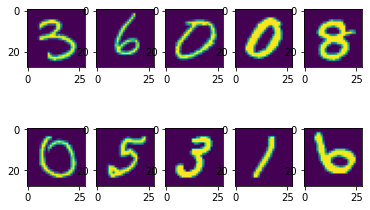

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
import time
from torchvision import datasets

### dataset 불러오기


import sys
sys.path.insert(0, "..")

# MNIST preprocessing
mnist_transform = transforms.Compose([
                                      transforms.ToTensor(),
])

mnist_train = torchvision.datasets.MNIST(root="./", train =True, download=True, transform=mnist_transform)
mnist_test = torchvision.datasets.MNIST(root="./", train =False, download=True, transform=mnist_transform)

transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5,), (0.5,))]
)

testset = datasets.MNIST(
    root = './data',
    train = False,
    download = True,
    transform = transform
)
testloader = torch.utils.data.DataLoader(
    testset, 
    batch_size = 4,
    shuffle = False
)


from torch.utils.data import DataLoader

batch_size = 10
train_loader = DataLoader(mnist_train, batch_size=batch_size, shuffle=True, num_workers=4)

for x, y in train_loader:
  print(x.shape)
  print(y)
  fig = plt.figure()
  for i in range(batch_size):
    plt.subplot(2, batch_size //2, i+1)
    plt.imshow(x[i].reshape(x[i].shape[1],-1))
  break

In [2]:
## making a model

class MLP(nn.Module):
  def __init__(self):
    super(MLP, self).__init__()
    self.layer0 = torch.nn.Linear(28*28, 64, bias=True) #we first take linear transform
    self.act = torch.nn.ReLU() #second layer - use activation function
    self.layer1 = torch.nn.Linear(64, 32, bias = False) #another linear transform
    self.layer2 = torch.nn.Linear(32, 10, bias=False)

  def forward(self, inputs):
    inputs = inputs.view(-1, 28*28) #match dimension
    hidden = self.layer0(inputs)
    hidden = self.act(hidden) #use activation function
    hidden = self.layer1(hidden)
    hidden = self.act(hidden)
    outputs = self.layer2(hidden) 
    return outputs

model = MLP() #GPU

[print(p.shape) for p in model.parameters()]

## learning

criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.03)
batch_size = 128
train_loader = DataLoader(mnist_train, batch_size = batch_size, shuffle=True)
test_loader = DataLoader(mnist_test, batch_size=batch_size, shuffle=True)

num_epochs = 200
loss_graph = {'train':[], 'test':[], 'epoch': []}

for epoch in range(num_epochs):
  for train_x, train_y in train_loader:
    train_predict = model(train_x)
    loss = criterion(train_predict, train_y)

    #backpropagation
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if epoch % 10 ==0:
    loss=criterion(train_predict, train_y)
    loss_graph['train'].append(loss) #train loss

    cnt = 0
    for test_x, test_y in test_loader:
      with torch.autograd.no_grad():
        test_predict = model(test_x)
        correct = torch.sum(torch.argmax(test_predict, dim=1) == test_y)
        cnt += correct.cpu().numpy() #test accuracy

    loss_test = criterion(test_predict, test_y)
    loss_graph['test'].append(loss_test) #test loss
    loss_graph['epoch'].append(epoch) 

    print("\ntest accuracy: {:.1f} %".format(100 * cnt / 10000))
    print("epoch:{}, train_loss:{:.4f}, test_loss:{:.4f}".format(epoch+1, loss, loss_test))

    

torch.Size([64, 784])
torch.Size([64])
torch.Size([32, 64])
torch.Size([10, 32])

test accuracy: 84.6 %
epoch:1, train_loss:0.5452, test_loss:0.3651

test accuracy: 94.7 %
epoch:11, train_loss:0.0664, test_loss:0.0710

test accuracy: 96.3 %
epoch:21, train_loss:0.2132, test_loss:0.0399

test accuracy: 97.0 %
epoch:31, train_loss:0.1282, test_loss:0.0152

test accuracy: 97.3 %
epoch:41, train_loss:0.0531, test_loss:0.0535

test accuracy: 97.5 %
epoch:51, train_loss:0.0310, test_loss:0.9300

test accuracy: 97.4 %
epoch:61, train_loss:0.0167, test_loss:0.0032

test accuracy: 97.7 %
epoch:71, train_loss:0.0600, test_loss:0.0205

test accuracy: 97.4 %
epoch:81, train_loss:0.0147, test_loss:0.0315

test accuracy: 97.5 %
epoch:91, train_loss:0.0061, test_loss:0.0012

test accuracy: 97.5 %
epoch:101, train_loss:0.0037, test_loss:0.0032

test accuracy: 97.6 %
epoch:111, train_loss:0.0044, test_loss:0.0289

test accuracy: 97.6 %
epoch:121, train_loss:0.0105, test_loss:0.0318

test accuracy: 97.6

In [3]:
## result
correct = 0
total = 0
with torch.no_grad():
  for train_x, train_y in test_loader:
    inputs = train_x
    labels = train_y
    outputs = model(inputs)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels).sum().item()
print('Accuracy of the network on test images: %0.3f %%' % (
    100 * correct / total))

Accuracy of the network on test images: 97.620 %
